### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

# df = pd.read_csv('../판다스/dataset/dataset_base/주가데이터.csv')
df = pd.read_csv('../dataset/dataset_base/주가데이터.csv')

df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [2]:
df.drop('전일종가', axis = 1, inplace = True)

In [3]:
df = df.rename(columns = {'연월일' : 'Date', 
                         '당일종가' : 'Close', 
                         '전일종가' : 'Open', 
                         '시가' : 'Start', 
                         '고가' : 'High', 
                         '저가' : 'Low', 
                         '거래량' : 'Volumn'})



df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# df.to_pickle('../판다스/dataset/sprice.pkl')
# df = pd.read_pickle('../판다스/dataset/sprice.pkl')

df.to_pickle('../dataset/sprice.pkl')
df = pd.read_pickle('../dataset/sprice.pkl')


df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [5]:
# NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 세팅하세요
# 칼럼 선택 : 'Close' 'Start' 'High' 'Low'

df['NDate'] = pd.to_datetime(df['Date'])

df.set_index('NDate', inplace = True)

df = df[['Close', 'Start', 'High', 'Low', 'Volumn']]
df1 = df[['Close', 'Start', 'High', 'Low']]

df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

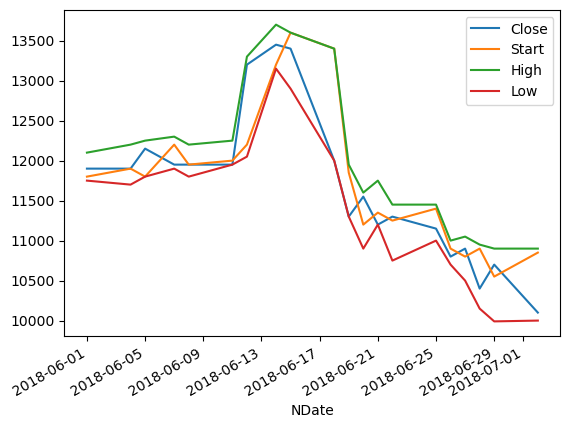

In [6]:
# 선그래프

df1.plot()

<AxesSubplot:xlabel='NDate'>

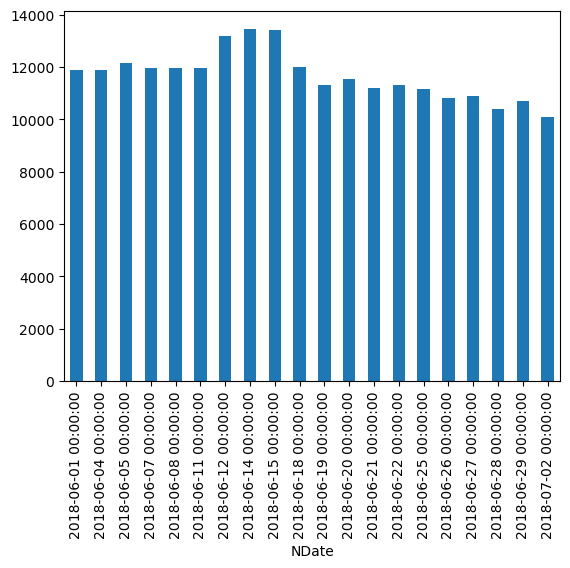

In [7]:
# 막대 그래프

df1.Close[: : -1].plot(kind = 'bar')

<AxesSubplot:xlabel='NDate'>

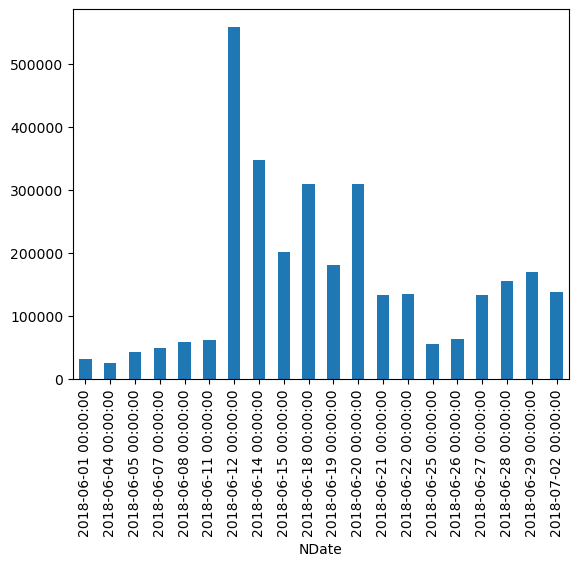

In [8]:
# 막대 그래프 : 일별 거래량

df.Volumn[: : -1].plot(kind = 'bar')

<AxesSubplot:xlabel='NDate'>

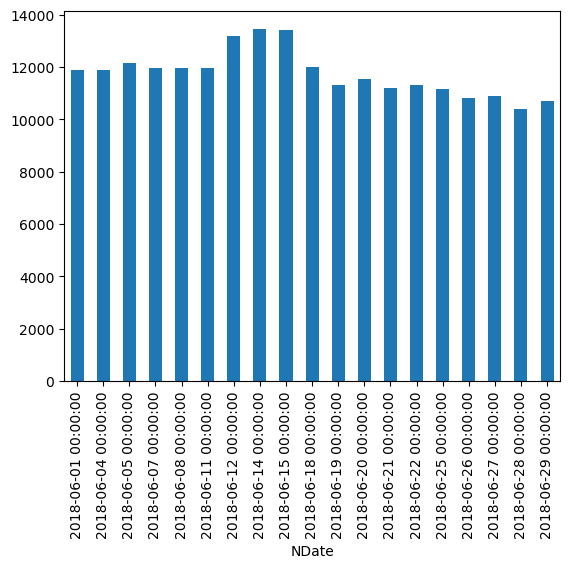

In [9]:
# 6월만 추출하여 Close 칼럼으로 일별 막대 그래프 표현

df1.loc['2018-06', 'Close'][: : -1].plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

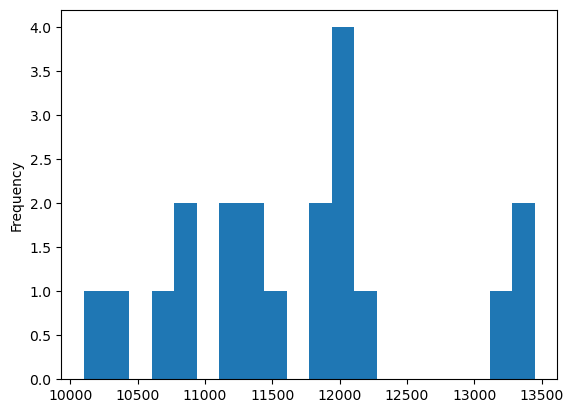

In [10]:
# hist 그래프 : 변수의 도수 분포를 보여줌 

df1.Close.plot(kind = 'hist', bins = 20)

<AxesSubplot:xlabel='Close', ylabel='Volumn'>

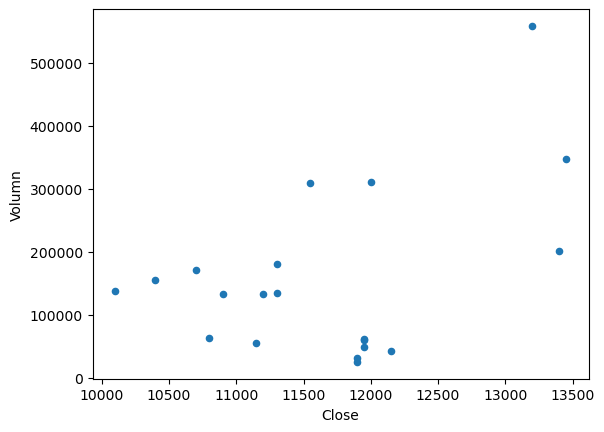

In [11]:
# scatter 그래프

df.plot(kind = 'scatter', x = 'Close', y = 'Volumn')

In [12]:
# 상관 계수

df.corr()

,Close,Start,High,Low,Volumn
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volumn,0.441466,0.337829,0.484145,0.246323,1.000000


In [13]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

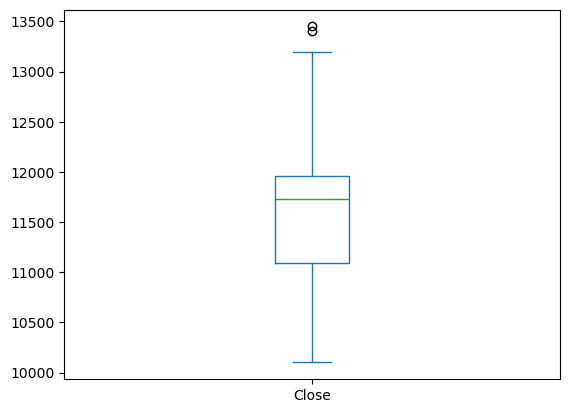

In [14]:
# box plot

df.Close.plot(kind = 'box')

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [15]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']

IQR = Q3 - Q1

# lower whisker

lower_whisker = df[df['Close'] <= (Q1 - IQR * 1.5)]

# upper whisker

upper_whisker = df[df['Close'] >= (Q3 + IQR * 1.5)]

# 이상치

abv = df[(df['Close'] <= (Q1 - IQR * 1.5)) | (df['Close'] >= (Q3 + IQR * 1.5))]

print(lower_whisker, '\n')
print(upper_whisker, '\n')
print(abv)

Empty DataFrame
Columns: [Close, Start, High, Low, Volumn]
Index: [] 

            Close  Start   High    Low  Volumn
NDate                                         
2018-06-15  13400  13600  13600  12900  201376
2018-06-14  13450  13200  13700  13150  347451 

            Close  Start   High    Low  Volumn
NDate                                         
2018-06-15  13400  13600  13600  12900  201376
2018-06-14  13450  13200  13700  13150  347451


In [16]:
# upper whisker 산출 기준

Q3 + IQR * 1.5

13275.0

In [17]:
# upper whisker = 13200
# 이상치 : u whisker를 벗어나는 값

df.sort_values('Close', ascending = False)[['Close']].head()

,Close
NDate,
2018-06-14,13450
2018-06-15,13400
2018-06-12,13200
2018-06-05,12150
2018-06-18,12000


13437.5 

NDate
2018-06-15    13600
Name: Start, dtype: int64


,Start
NDate,
2018-06-15,13600
2018-06-18,13400
2018-06-14,13200
2018-06-07,12200
2018-06-12,12200


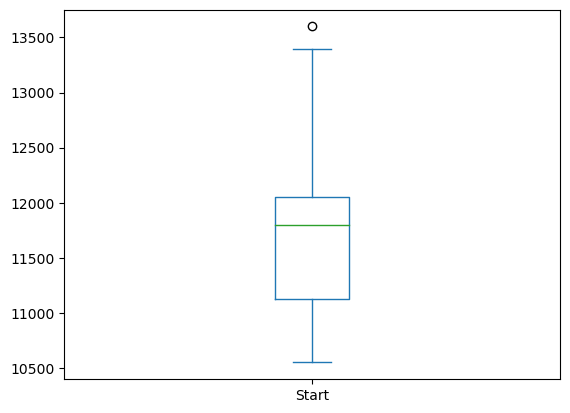

In [35]:
# Start 칼럼의 분포 및 이상치 여부를 탐색하는  box plot 및 이상치를 구하세요



df.Start.plot(kind = 'box')

q1 = df['Start'].quantile(0.25) # .describe()['25%']
q3 = df['Start'].quantile(0.75)

iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr

abv = df[df['Start'] > upper_whisker]['Start']

print(upper_whisker, '\n')
print(abv)

df.sort_values('Start', ascending = False)[['Start']].head() # ascending 은 내림차순 오름차순 여부

13631.25
NDate
2018-06-14    13700
Name: High, dtype: int64


,Close,Start,High,Low,Volumn
NDate,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


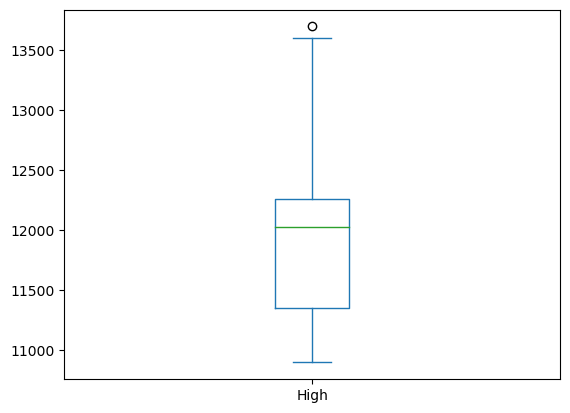

In [52]:
# 과제 High Low 컬럼에 대하여 이상치 여부를 시각화 후 그 값을 제거

df.High.plot(kind = 'box')

q1 = df.High.quantile(0.25)
q3 = df.High.quantile(0.75)

iqr = q3 - q1

upper = q3 + 1.5 * iqr

abv = df[df['High'] >  upper]['High']

print(upper)
print(abv)

df.High.drop(abv.index, axis = 0, inplace = True)

df.head(10)

13675.0
Series([], Name: Low, dtype: int64)


,Close,Start,High,Low,Volumn
NDate,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


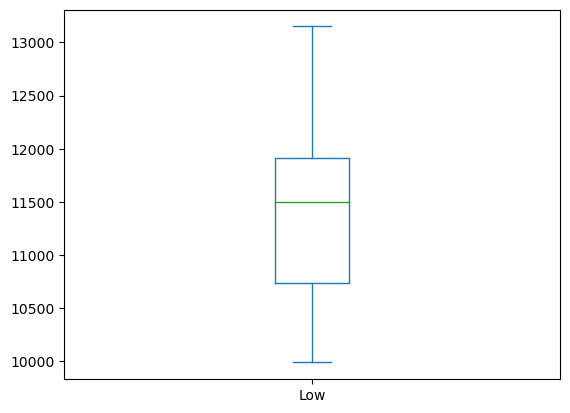

In [53]:
df.Low.plot(kind = 'box')

q1 = df.Low.quantile(0.25)
q3 = df.Low.quantile(0.75)

iqr = q3 - q1

upper = q3 + 1.5 * iqr

abv = df[df['Low'] >  upper]['Low']

print(upper)
print(abv)

df.Low.drop(abv.index, inplace = True)

df.head()

In [21]:
# 남북한의 연도별 발전량 데이터 셋
# 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요

# df_ep = pd.read_excel('../판다스/dataset/dataset_base/df_ep.xlsx')
df_ep = pd.read_excel('../dataset/dataset_base/df_ep.xlsx')

df_ep.head()

,year,south,notth
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [22]:
df_ep.set_index('year', inplace = True)

<AxesSubplot:xlabel='year'>

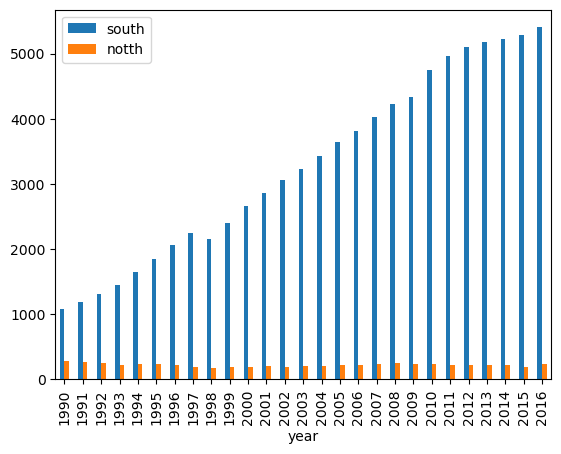

In [23]:
df_ep.plot(kind = 'bar')

In [24]:
# df_auto = pd.read_excel('../판다스/dataset/dataset_base/auto-mpg.xlsx')
df_auto = pd.read_excel('../dataset/dataset_base/auto-mpg.xlsx')

df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [25]:
# 과제 df_auto의 각 칼럼을 시각화 해서 탐색한 후 인사이트를 기술하세요

df_auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


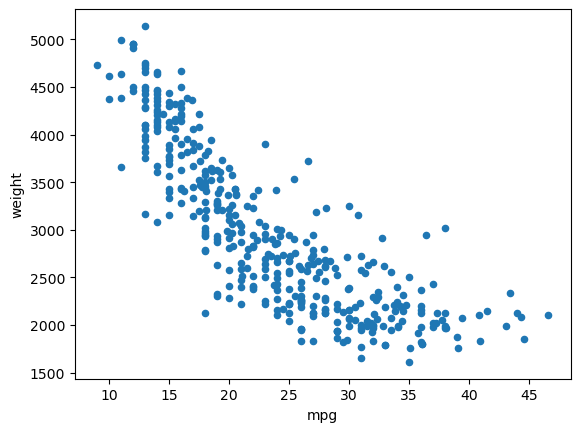

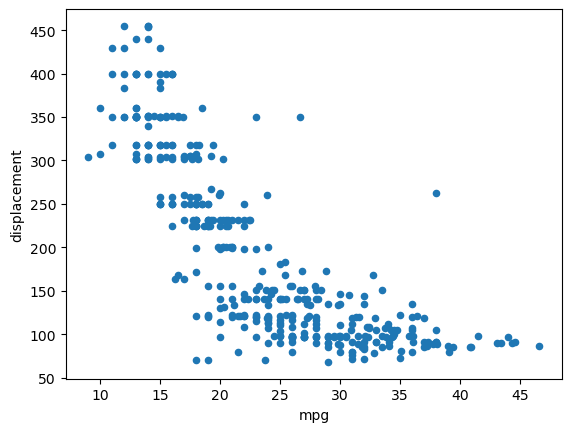

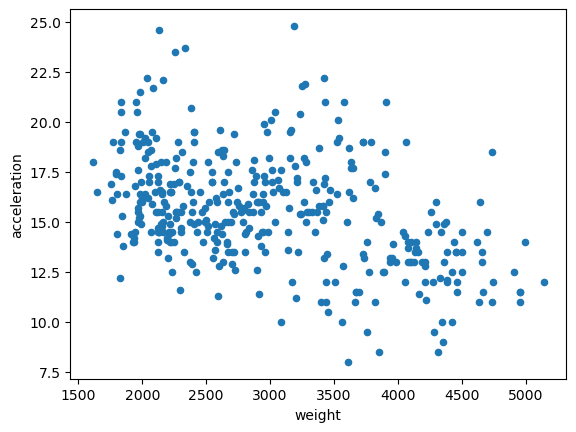

In [26]:
df1 = df_auto.plot(kind = 'scatter', x = 'mpg' , y = 'weight')

df2 = df_auto.plot(kind = 'scatter', x = 'mpg' , y = 'displacement')

df3 = df_auto.plot(kind = 'scatter', x = 'weight' , y = 'acceleration')

In [54]:
# 과제 mpg 컬럼의 이상치 여버를 판단하고 의심되는 값이 있는경우 그 값을 제거

q1 = df_auto.mpg.describe()['25%']
q3 = df_auto.mpg.describe()['75%']

iqr = q3 - q1

upper = q3 + 1.5 * iqr

abv = df_auto[df_auto['mpg'] > upper]['mpg']

print(upper)
print(abv)

df_auto[df_auto['mpg'] > 46.25].index

df_auto.loc[322, 'mpg']

df_auto.drop(322, axis = 0, inplace = True)

df_auto


46.25
Series([], Name: mpg, dtype: float64)


KeyError: 322

<AxesSubplot:xlabel='mpg', ylabel='weight'>

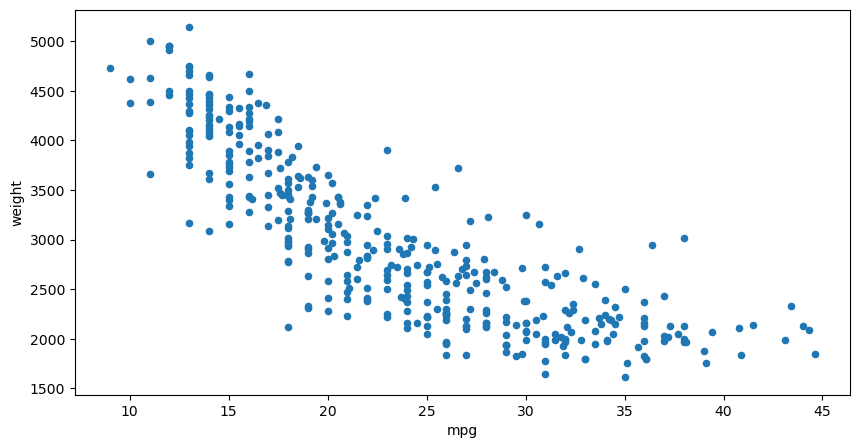

In [55]:
df_auto[['mpg', 'weight']].plot(x = 'mpg', y = 'weight', kind = 'scatter', figsize = (10, 5))